# Basic ML pipeline with sklearn
In this notebook we will cover a basic machine learning pipeline using the sklearn library. We'll use a wine dataset to illustrate the workflow: https://archive-beta.ics.uci.edu/ml/datasets/Wine.



The goal is to use chemical composition of wine determine the type of grapes it was made from, i.e. the cultivar (kind of like a varietal). There are 3 distinct Italian cultivars in this dataset, and 13 features we can use to model/predict them.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Data description

1. Title of Database: Wine recognition data

	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:

   * Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.

   * Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   
   * July 1991
3. Past Usage:

   * S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

  The data was used with many others for comparing various
  classifiers. The classes are separable, though only RDA
  has achieved 100% correct classification.
  (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
  (All results using the leave-one-out technique)

  In a classification context, this is a well posed problem
  with "well behaved" class structures. A good data set
  for first testing of a new classifier, but not very
  challenging.

   * S. Aeberhard, D. Coomans and O. de Vel,
   "THE CLASSIFICATION PERFORMANCE OF RDA"
   Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Journal of Chemometrics).

   Here, the data was used to illustrate the superior performance of
   the use of a new appreciation function with RDA.

4. Relevant Information:

   * These data are the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines.

   * I think that the initial data set had around 30 variables, but
      for some reason I only have the 13 dimensional version.
      I had a list of what the 30 or so variables were, but a.)
      I lost it, and b.), I would not know which 13 variables
      are included in the set.

   * The attributes are (donated by Riccardo Leardi, riclea@anchem.unige.it)

 	1. Alcohol
 	2. Malic acid
 	3. Ash
	4. Alcalinity of ash  
 	5. Magnesium
	6. Total phenols
 	7. Flavanoids
 	8. Nonflavanoid phenols
 	9. Proanthocyanins
	10. Color intensity
 	11. Hue
 	12. OD280/OD315 of diluted wines
 	13. Proline            

6. Number of Attributes

      	13

7. For Each Attribute:

  * All attributes are continuous.
  * No statistics available, but suggest to standardise.
  * Variables for certain uses (e.g. for us with classifiers which are NOT scale invariant)

 NOTE: 1st column (Cultivar) is class identifier (1-3)

8. Missing Attribute Values:

	None

9. Class Distribution (Cultivar): number of instances per class

      	class 1 59
      	class 2 71
      	class 3 48

## Get the data

Here the 0th column is the class label (1, 2, or 3 for the 3 cultivars), all other columns are features. The features (aka  "predictors," "covariates," "regressors," "independent variables", and on and on...) are used to differentiate the different types of grapes.

Cultivars:

1 = "Barolo"

2 = "Grignolino"

3 = "Barbera"

[Link to wine data](https://docs.google.com/spreadsheets/d/1sVop1IEpQ8J3dyBY9kAUB_aZBzgNBy6iibMEhhIlCdg/edit?usp=sharing)

In [3]:
sheet_id = "1sVop1IEpQ8J3dyBY9kAUB_aZBzgNBy6iibMEhhIlCdg"
df = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/" + sheet_id + "/export?format=csv")
df.head()

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# just keep the attribute names
names = df.columns.values[1:]

In [5]:
# summary stats
df.describe()

,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# first column is the label
df['Cultivar'].value_counts()

2    71
1    59
3    48
Name: Cultivar, dtype: int64

## Make a train / validation / test split
The train set is used to train the data. The validation set is used to find model hyperparameters. The test set is used to estimate the actual error/performance of the model. The goal of machine learning is to **generalize**-- that is, to perform well on previously **unseen** data. The model is going to have a smaller error on the data that was used for training than on unseen data-- this is called model optimism.

I am not tuning any hyperparameters this time, so I don't need validation. I will split into just train & test sets.

In [7]:
df.shape

(178, 14)

In [8]:
Y = df.iloc[:,0].values
X = df.iloc[:,1:].values

In [9]:
X.shape

(178, 13)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
x_train.shape, x_test.shape

((142, 13), (36, 13))

### Let's double check that the regions are represented similarly across test and training sets.

In [12]:
pd.Series(y_train).value_counts() / y_train.shape

2    0.401408
1    0.338028
3    0.260563
dtype: float64

In [13]:
pd.Series(y_test).value_counts() / y_test.shape

2    0.388889
1    0.305556
3    0.305556
dtype: float64

### If class distribution is very different, we can split the data in a stratified way based on the cultivars.


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [15]:
pd.Series(y_train).value_counts() / y_train.shape

2    0.401408
1    0.330986
3    0.267606
dtype: float64

In [16]:
pd.Series(y_test).value_counts() / y_test.shape

2    0.388889
1    0.333333
3    0.277778
dtype: float64

## Look at basic plots

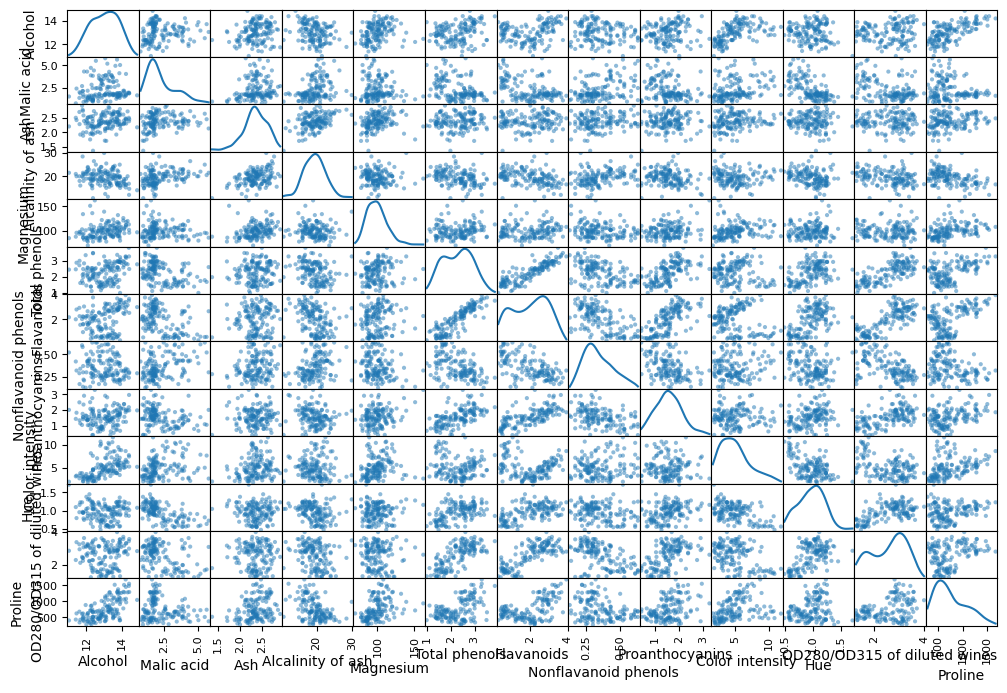

In [17]:
df_train = pd.DataFrame(x_train)
df_train.columns = names
# semicolon gets rid of the obscene amount of text
pd.plotting.scatter_matrix(df_train, diagonal='kde', figsize=(12,8));

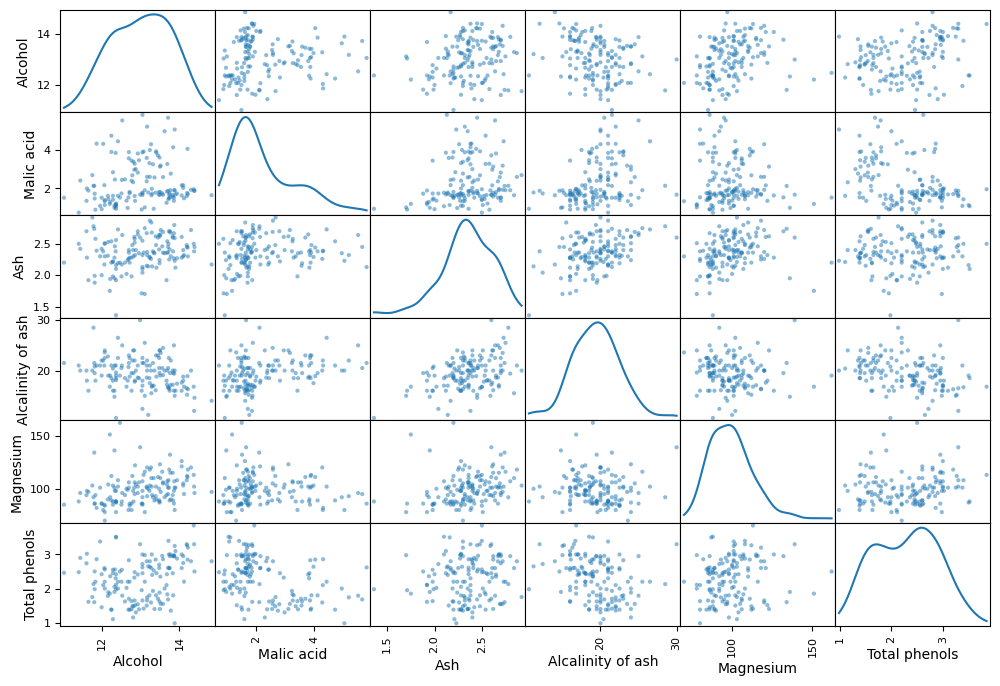

In [18]:
# semicolon gets rid of the obscene amount of text
pd.plotting.scatter_matrix(df_train.iloc[:,0:6], diagonal='kde', figsize=(12,8));

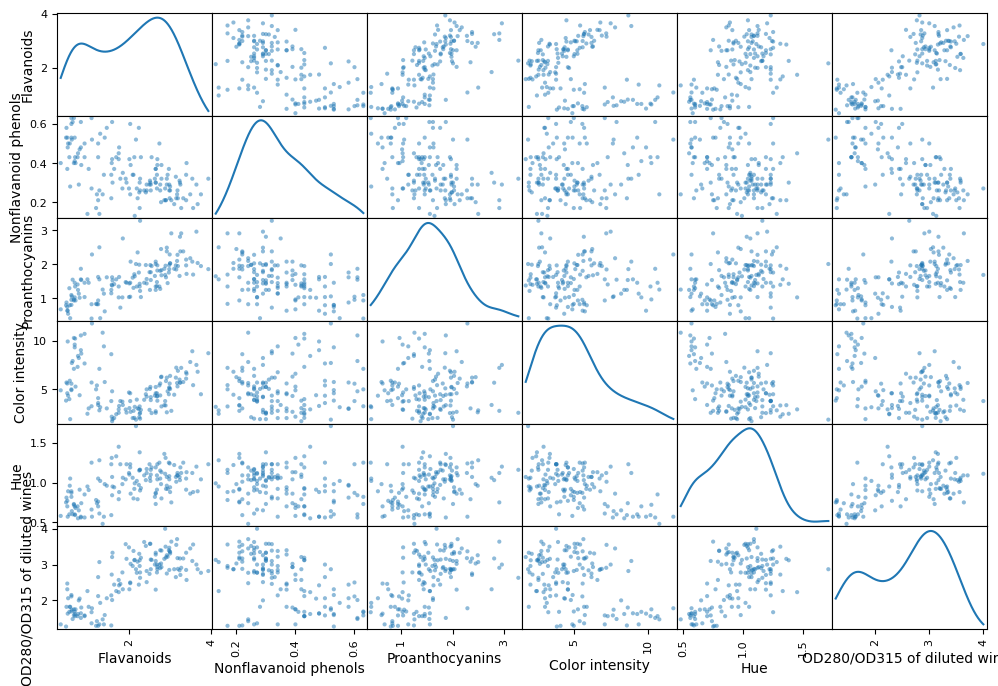

In [19]:
# semicolon gets rid of the obscene amount of text
pd.plotting.scatter_matrix(df_train.iloc[:,6:12], diagonal='kde', figsize=(12,8));

In [20]:
def get_2_var_plots(
    x: np.array,
    y: np.array,
    names: np.array,
    var_1: int,
    var_2: int) -> None:
  """Creates a scatterplot of two variables in x, grouped by values in y.

  Args:
    x (np.array): An np.array of floats with shape (n, p).
    y (np.array): An np.array with shape (n, ).
    names (np.array): An np.array of strings with shape (p, ).
    var_1 (int): The column to select from x to plot on the x-axis.
    var_2 (int): The column to select from x to plot on the y-axis.

  Returns:
    Nothing
  """

  x1 = x[:, var_1]
  x2 = x[:, var_2]
  plt.scatter(x1, x2, c = y)
  plt.xlabel(names[var_1])
  plt.ylabel(names[var_2])

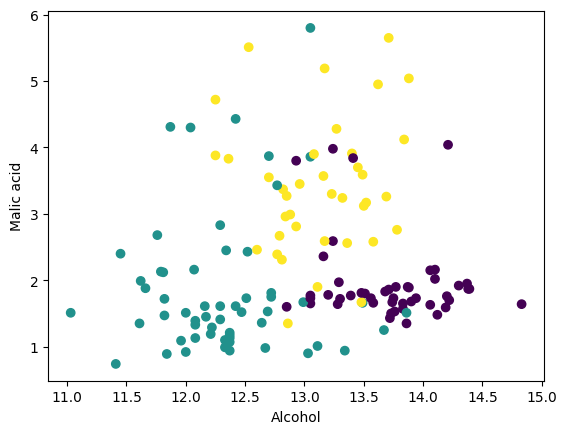

In [21]:
get_2_var_plots(x_train, y_train, names, 0, 1)

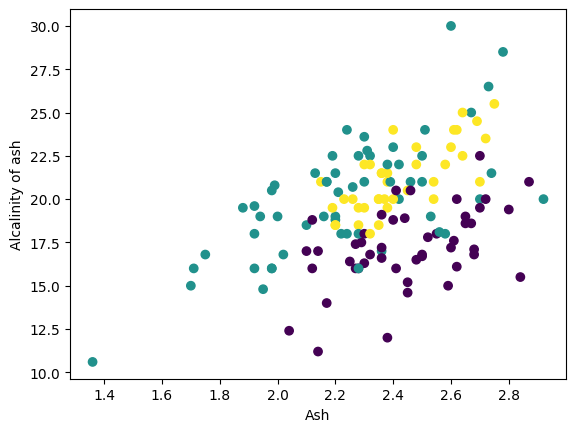

In [22]:
get_2_var_plots(x_train, y_train, names, 2, 3)

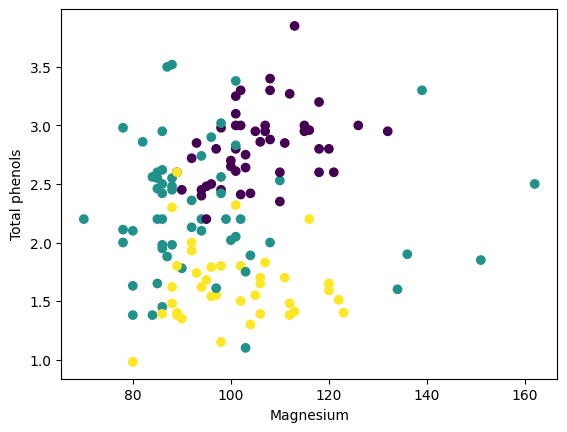

In [23]:
get_2_var_plots(x_train, y_train, names, 4, 5)

## Standarize your data
We will be fitting a linear model. In this case is always a good idea to standarize your data. If we want to regularize we have to standarize. The `StandardScaler()` will compute mean and standard deviation from the training set and apply it to the training and test sets.

If we don't scale the data sometimes the linear model doesn't converge fast enough.

In [24]:
# creates the scaler
scaler = StandardScaler()
# computes mean and standard deviation from training data
scaler.fit(x_train)

StandardScaler()

In [25]:
scaler.mean_

array([1.30084507e+01, 2.30485915e+00, 2.36056338e+00, 1.94415493e+01,
       9.99225352e+01, 2.28943662e+00, 2.01781690e+00, 3.53028169e-01,
       1.56154930e+00, 5.04690140e+00, 9.64126761e-01, 2.58246479e+00,
       7.58394366e+02])

In [26]:
# transforms both the train and test sets
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [27]:
pd.DataFrame(X_train, columns = names)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,-2.018381,0.083639,0.229622,0.178899,-0.271537,0.989495,0.803402,-0.268867,0.479755,-0.798532,-0.725919,1.144431,-0.407554
1,-0.826870,-1.085577,-1.006636,-0.301624,-0.825337,1.994284,1.802214,-0.920111,0.694210,-0.243040,0.335581,0.265773,-0.300620
2,0.649567,-0.443827,1.118182,-0.141450,0.697612,0.098151,0.532890,-0.513084,-0.038511,-0.376358,0.600956,0.407492,1.028416
3,0.053811,1.367139,-0.156709,0.979770,-1.033012,-1.036288,-0.445113,2.091891,0.104459,-0.109721,-0.549002,-0.811292,-0.743631
4,1.776321,-0.382289,0.075090,-2.383888,0.143812,1.637746,1.687767,-0.513084,2.499208,1.090142,1.043248,0.591727,2.409390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.092665,1.402304,-0.002177,0.659421,0.905287,-1.425239,-0.653199,-0.106056,-0.753362,1.934490,-1.743190,-1.774981,-0.636698
138,0.209226,0.250670,0.036457,0.178899,1.389861,-1.036288,-1.391904,1.440647,-0.181481,1.890050,-1.610503,-1.363996,0.249326
139,0.520055,1.349557,-0.929370,-0.205519,-0.686887,0.260213,0.688955,-0.675895,-0.145739,-0.340806,-0.239398,0.591727,0.845100
140,-0.257017,0.004519,0.152356,1.460292,-0.133087,-1.846602,-0.965328,-0.675895,-1.307371,0.290233,-1.345128,-1.732465,-0.606145


In [28]:
 # 0 here represents the std is calculated over entries in rows
 X_train.std(0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
# not perfectly 1 because we used the std computed from training data
X_test.std(0)

array([1.22015187, 0.88474713, 1.25231765, 1.29502331, 0.92666752,
       1.05446917, 1.1674348 , 1.00069509, 1.07056175, 1.12849949,
       1.03126495, 0.99992478, 0.76336734])

## Fit a model

In [30]:
# this creates a model with the one-vs-rest MLR scheme
wine_classifier = LogisticRegression(random_state=8675309, multi_class="ovr")
# this fits the model to the training data
wine_classifier.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=8675309)

In [31]:
# predicting
y_train_hat = wine_classifier.predict(X_train)
y_test_hat = wine_classifier.predict(X_test)

In [32]:
y_test_hat

array([2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 3, 1, 3, 2, 2, 3, 1, 3, 3, 2,
       3, 3, 2, 1, 2, 2, 2, 1, 1, 1, 3, 2, 2, 3])

In [33]:
# computing training and testing accuracy
accuracy_score(y_train, y_train_hat), accuracy_score(y_test, y_test_hat)

(1.0, 0.9722222222222222)

## Looking at the model
here is the documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [34]:
# gives you the coeficients
wine_classifier.coef_

array([[ 1.33402823,  0.4744359 ,  0.89263996, -1.35627662,  0.17235735,
         0.35031947,  0.99340131, -0.27013686, -0.12549813,  0.17883319,
        -0.05962523,  0.96179734,  1.72610902],
       [-1.48546076, -0.82290868, -1.0934138 ,  0.68487247, -0.2471513 ,
         0.06364843,  0.3259327 ,  0.42780903,  0.3066108 , -1.89030142,
         0.92843562,  0.02791365, -1.70478333],
       [ 0.58072807,  0.6564909 ,  0.559467  ,  0.42523797,  0.34049127,
        -0.47231301, -1.34168465, -0.08745239, -0.83777566,  1.12228017,
        -1.04447902, -1.03153608,  0.03583779]])

In [35]:
# notice the shape of the coeficients because we have 3 classes
wine_classifier.coef_.shape

(3, 13)

## Visualizing decision boundaries for a LR with only two predictors

Normally I use plotnine for visualization but in this case it's easier to do what we want in matplotlib:

In [36]:
# let's fit a model with two variables

# this creates a model
wine_classifier = LogisticRegression(random_state=8675309)
# fits the model
wine_classifier.fit(X_train[:,:2], y_train)

LogisticRegression(random_state=8675309)

Create a fine(-ish) mesh on [-1, 2] x [-1, 2]:

In [38]:
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(-1, 2, h), np.arange(-1, 2, h))

In [39]:
xx

array([[-1.  , -0.98, -0.96, ...,  1.94,  1.96,  1.98],
       [-1.  , -0.98, -0.96, ...,  1.94,  1.96,  1.98],
       [-1.  , -0.98, -0.96, ...,  1.94,  1.96,  1.98],
       ...,
       [-1.  , -0.98, -0.96, ...,  1.94,  1.96,  1.98],
       [-1.  , -0.98, -0.96, ...,  1.94,  1.96,  1.98],
       [-1.  , -0.98, -0.96, ...,  1.94,  1.96,  1.98]])

In [40]:
xx.ravel()

array([-1.  , -0.98, -0.96, ...,  1.94,  1.96,  1.98])

In [41]:
help(np.ravel)

Help on function ravel in module numpy:

ravel(a, order='C')
    Return a contiguous flattened array.
    
    A 1-D array, containing the elements of the input, is returned.  A copy is
    made only if needed.
    
    As of NumPy 1.10, the returned array will have the same type as the input
    array. (for example, a masked array will be returned for a masked array
    input)
    
    Parameters
    ----------
    a : array_like
        Input array.  The elements in `a` are read in the order specified by
        `order`, and packed as a 1-D array.
    order : {'C','F', 'A', 'K'}, optional
    
        The elements of `a` are read using this index order. 'C' means
        to index the elements in row-major, C-style order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest.  'F' means to index the elements
        in column-major, Fortran-style order, with the
        first index changing fastest, and the last index changing
       

In [42]:
 # helps get all combinations of x, y pairs
 Z = wine_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

In [43]:
xx.shape

(150, 150)

In [44]:
xx.ravel().shape

(22500,)

In [45]:
np.c_[xx.ravel(), yy.ravel()].shape

(22500, 2)

In [46]:
np.c_[xx.ravel(), yy.ravel()]

array([[-1.  , -1.  ],
       [-0.98, -1.  ],
       [-0.96, -1.  ],
       ...,
       [ 1.94,  1.98],
       [ 1.96,  1.98],
       [ 1.98,  1.98]])

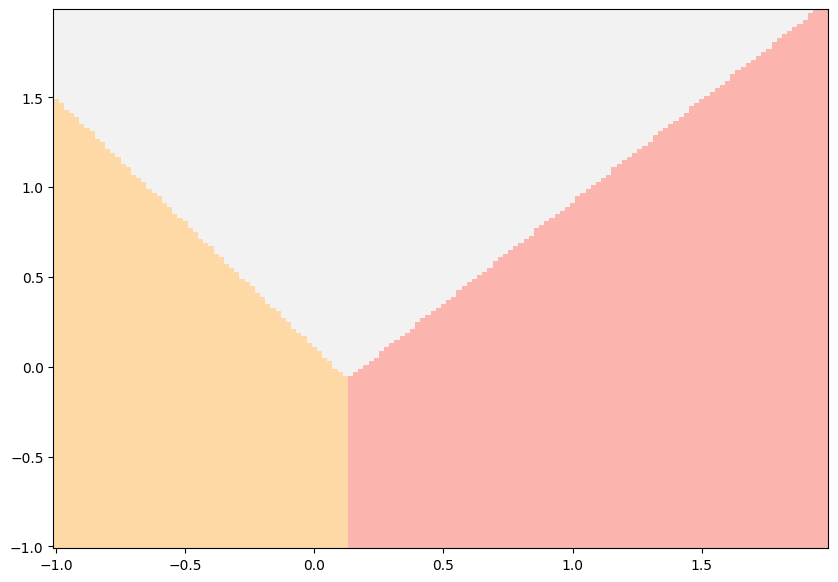

In [47]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1, shading='auto')

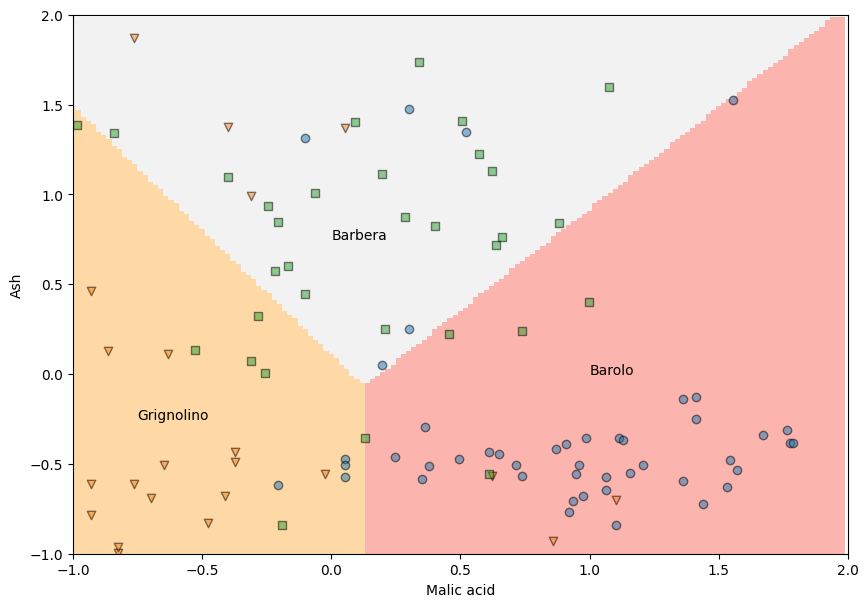

In [48]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1, shading='auto')

# Plot also the training points
markers = ["o", "v", "s"]
for l in [1, 2, 3]:
  x1 = X_train[y_train == l, 0]
  x2 = X_train[y_train == l, 1]
  plt.scatter(x1, x2, marker=markers[l-1], edgecolor="black", alpha=.5)
plt.xlabel(names[1])
plt.ylabel(names[2])

plt.xlim(-1, 2)
plt.ylim(-1, 2)

plt.text(1,0,'Barolo')
plt.text(-0.75, -0.25,'Grignolino')
plt.text(0, .75,'Barbera')\

plt.show()

In [49]:
wine_classifier.predict([[1,0]])

array([1])

In [50]:
wine_classifier.predict([[-0.75, 0.25]])

array([2])

In [51]:
wine_classifier.predict([[0, 0.75]])

array([3])

## In-class Lab
1. Find another dataset with and at least 10 features and a categorical response with >2 classes to predict.

  a. There are lots on [UCI website](https://archive.ics.uci.edu/ml/datasets).

  b. An easy but boring option: [Iris data](https://archive.ics.uci.edu/ml/datasets/iris).

2. Split data into: train / test sets.
3. Apply standard scaling.
4. Fit a logistic regression model.
5. Compute train and test accuracy.
6. Visualize the decision boundary on a model for two variables.
7. Read the sklearn documentation and figure out how to predict probabilities instead of predicting a class for every observation.
8. If you are just given the estimated probabilities of each class for a given observation, how do you translate this into a prediction of the class itself?
9. What happens if two classes are equally likely?
10. Now consider the case where you also need to do model selection, and thus, hyperparameter tuning (e.g. regularization with LASSO, ridge, elastic net, etc.). How would you go about implementing a split of the data into training, validation, and testing sets?

### Install the UCIML Repository package

In [ ]:
pip install ucimlrepo

### Fetch the Iris data

Use the "Import to Python" option on the data page.

In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'},

In [4]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)